# Final Project
## *Part 2: Building models*

Goal: **Predict Sales**  
*how much money the game will make*

Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import OLS, add_constant
from statsmodels.formula.api import ols

import scipy.stats as st
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [2]:
df=pd.read_csv("vgsales2016_clean.csv", index_col='Unnamed: 0')
df.head()

,Name,Publisher,Year_of_Release,Game_Age,Genre,Platform,Platform_Launch_Year,Game_released_xYears_after_Platform,Platform_Death,Years_since_Platform_Discontinued,Platform_Lifespan,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Nintendo,2006,10,Sports,Wii,2006,0,2016,0,10,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,Nintendo,1985,31,Platform,NES,1983,2,1995,21,12,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Nintendo,2008,8,Racing,Wii,2006,2,2016,0,10,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Nintendo,2009,7,Sports,Wii,2006,3,2016,0,10,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,Nintendo,1996,20,Role-Playing,GB,1989,7,2003,13,14,11.27,8.89,10.22,1.00,31.37


### 1. Preprocessing

#### *Converting all values to numerical*

In [3]:
df.dtypes

Name                                    object
Publisher                               object
Year_of_Release                          int64
Game_Age                                 int64
Genre                                   object
Platform                                object
Platform_Launch_Year                     int64
Game_released_xYears_after_Platform      int64
Platform_Death                           int64
Years_since_Platform_Discontinued        int64
Platform_Lifespan                        int64
NA_Sales                               float64
EU_Sales                               float64
JP_Sales                               float64
Other_Sales                            float64
Global_Sales                           float64
dtype: object

In [4]:
# Consider making dummies
print("Unique counts: Genre", df.Genre.nunique(),
      "| Platform",df.Platform.nunique(),
      "| Publisher",df.Publisher.nunique())

Unique counts: Genre 12 | Platform 31 | Publisher 29


In [5]:
# Drop Publisher (too many unique values)
df.drop('Publisher',axis=1, inplace=True)

#### Dummies (Genre and Platform)

In [6]:
# Get dummies for Genre
dummies1 = pd.get_dummies(df.Genre)

In [7]:
df = pd.concat([df, dummies1], axis=1)
df.columns

Index(['Name', 'Year_of_Release', 'Game_Age', 'Genre', 'Platform',
       'Platform_Launch_Year', 'Game_released_xYears_after_Platform',
       'Platform_Death', 'Years_since_Platform_Discontinued',
       'Platform_Lifespan', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Action', 'Adventure', 'Fighting', 'Misc', 'Platform',
       'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object')

In [8]:
# Get dummies for Platform
dummies2 = pd.get_dummies(df.Platform)

In [9]:
df = pd.concat([df, dummies2], axis=1)
df.columns

Index(['Name', 'Year_of_Release', 'Game_Age', 'Genre', 'Platform',
       'Platform_Launch_Year', 'Game_released_xYears_after_Platform',
       'Platform_Death', 'Years_since_Platform_Discontinued',
       'Platform_Lifespan', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Action', 'Adventure', 'Fighting', 'Misc', 'Platform',
       'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', 'Platform', 'Platform_2600', 'Platform_3DO', 'Platform_3DS',
       'Platform_DC', 'Platform_DS', 'Platform_GB', 'Platform_GBA',
       'Platform_GC', 'Platform_GEN', 'Platform_GG', 'Platform_N64',
       'Platform_NES', 'Platform_NG', 'Platform_PC', 'Platform_PCFX',
       'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4',
       'Platform_PSP', 'Platform_PSV', 'Platform_SAT', 'Platform_SCD',
       'Platform_SNES', 'Platform_TG16', 'Platform_WS', 'Platform_Wii',
       'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_

In [10]:
# Drop categorical Genre and Platform
df.drop(['Genre','Platform'],axis=1, inplace=True)

In [11]:
df.shape

(16415, 55)

#### Index (Name)

In [12]:
df['identifier'] = df.index
df.head()

,Name,Year_of_Release,Game_Age,Platform_Launch_Year,Game_released_xYears_after_Platform,Platform_Death,Years_since_Platform_Discontinued,Platform_Lifespan,NA_Sales,EU_Sales,...,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,identifier
0,Wii Sports,2006,10,2006,0,2016,0,10,41.36,28.96,...,0,0,0,0,1,0,0,0,0,0
1,Super Mario Bros.,1985,31,1983,2,1995,21,12,29.08,3.58,...,0,0,0,0,0,0,0,0,0,1
2,Mario Kart Wii,2008,8,2006,2,2016,0,10,15.68,12.76,...,0,0,0,0,1,0,0,0,0,2
3,Wii Sports Resort,2009,7,2006,3,2016,0,10,15.61,10.93,...,0,0,0,0,1,0,0,0,0,3
4,Pokemon Red/Pokemon Blue,1996,20,1989,7,2003,13,14,11.27,8.89,...,0,0,0,0,0,0,0,0,0,4


In [13]:
df.dtypes

Name                                    object
Year_of_Release                          int64
Game_Age                                 int64
Platform_Launch_Year                     int64
Game_released_xYears_after_Platform      int64
Platform_Death                           int64
Years_since_Platform_Discontinued        int64
Platform_Lifespan                        int64
NA_Sales                               float64
EU_Sales                               float64
JP_Sales                               float64
Other_Sales                            float64
Global_Sales                           float64
Action                                   uint8
Adventure                                uint8
Fighting                                 uint8
Misc                                     uint8
Puzzle                                   uint8
Racing                                   uint8
Role-Playing                             uint8
Shooter                                  uint8
Simulation   

#### Final touches

In [14]:
df1 = df.copy()

In [15]:
# Drop name
df1.drop(['Name'],axis=1, inplace=True)

In [16]:
df1.columns

Index(['Year_of_Release', 'Game_Age', 'Platform_Launch_Year',
       'Game_released_xYears_after_Platform', 'Platform_Death',
       'Years_since_Platform_Discontinued', 'Platform_Lifespan', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Action',
       'Adventure', 'Fighting', 'Misc', 'Puzzle', 'Racing', 'Role-Playing',
       'Shooter', 'Simulation', 'Sports', 'Strategy', 'Platform_2600',
       'Platform_3DO', 'Platform_3DS', 'Platform_DC', 'Platform_DS',
       'Platform_GB', 'Platform_GBA', 'Platform_GC', 'Platform_GEN',
       'Platform_GG', 'Platform_N64', 'Platform_NES', 'Platform_NG',
       'Platform_PC', 'Platform_PCFX', 'Platform_PS', 'Platform_PS2',
       'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV',
       'Platform_SAT', 'Platform_SCD', 'Platform_SNES', 'Platform_TG16',
       'Platform_WS', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XB', 'Platform_XOne', 'identifier'],
      dtype='object')

In [17]:
df1 = df1[['identifier', 'Year_of_Release', 'Game_Age', 'Platform_Launch_Year',
           'Game_released_xYears_after_Platform', 'Platform_Death',
           'Years_since_Platform_Discontinued', 'Platform_Lifespan',  
           'Global_Sales', 
           'Action','Adventure', 'Fighting', 'Misc', 'Puzzle', 'Racing', 'Role-Playing','Shooter', 'Simulation', 'Sports', 'Strategy', 
           'Platform_2600','Platform_3DO', 'Platform_3DS', 'Platform_DC', 'Platform_DS',
           'Platform_GB', 'Platform_GBA', 'Platform_GC', 'Platform_GEN',
           'Platform_GG', 'Platform_N64', 'Platform_NES', 'Platform_NG',
           'Platform_PC', 'Platform_PCFX', 'Platform_PS', 'Platform_PS2',
           'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV',
           'Platform_SAT', 'Platform_SCD', 'Platform_SNES', 'Platform_TG16',
           'Platform_WS', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
           'Platform_XB', 'Platform_XOne']]

In [18]:
df1

,identifier,Year_of_Release,Game_Age,Platform_Launch_Year,Game_released_xYears_after_Platform,Platform_Death,Years_since_Platform_Discontinued,Platform_Lifespan,Global_Sales,Action,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,0,2006,10,2006,0,2016,0,10,82.53,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1985,31,1983,2,1995,21,12,40.24,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2008,8,2006,2,2016,0,10,35.52,0,...,0,0,0,0,0,1,0,0,0,0
3,3,2009,7,2006,3,2016,0,10,32.77,0,...,0,0,0,0,0,1,0,0,0,0
4,4,1996,20,1989,7,2003,13,14,31.37,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16411,16411,2016,0,2006,10,2016,0,10,0.01,1,...,0,0,0,0,0,0,0,0,0,0
16412,16412,2006,10,2005,1,2016,0,11,0.01,0,...,0,0,0,0,0,0,0,1,0,0
16413,16413,2016,0,2011,5,2016,0,5,0.01,0,...,0,0,0,0,0,0,0,0,0,0
16414,16414,2003,13,2001,2,2010,6,9,0.01,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df1.dtypes

identifier                               int64
Year_of_Release                          int64
Game_Age                                 int64
Platform_Launch_Year                     int64
Game_released_xYears_after_Platform      int64
Platform_Death                           int64
Years_since_Platform_Discontinued        int64
Platform_Lifespan                        int64
Global_Sales                           float64
Action                                   uint8
Adventure                                uint8
Fighting                                 uint8
Misc                                     uint8
Puzzle                                   uint8
Racing                                   uint8
Role-Playing                             uint8
Shooter                                  uint8
Simulation                               uint8
Sports                                   uint8
Strategy                                 uint8
Platform_2600                            uint8
Platform_3DO 

### 2. First set of models

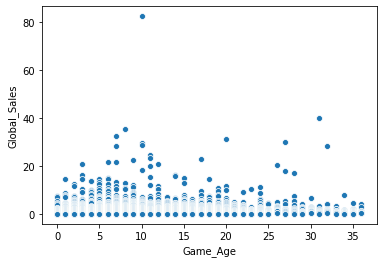

In [20]:
sns.scatterplot(df.Game_Age,df.Global_Sales)

#### OLS1 (all)

In [21]:
y=df1.Global_Sales
X=df1.drop('Global_Sales',axis=1)

In [22]:
model1=OLS(y,add_constant(X))
results1=model1.fit()

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [23]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     93.69
Date:                Fri, 07 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:43:24   Log-Likelihood:                -28784.
No. Observations:               16415   AIC:                         5.766e+04
Df Residuals:                   16371   BIC:                         5.800e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                2.356e-06   2.38e-06      0.991      0.322   -2.31e-06    7.02e-06
identifier                             -0.0001   2.53e-06    -54.645      0.000      -0.000      -0.000
Year_of_Release                        -0.0052      0.002     -2.133      0.033      -0.010      -0.000
Game_Age                                0.0100      0.003      2.985      0.003       0.003       0.017
Platform_Launch_Year                   -0.0015      0.001     -1.014      0.311      -0.004       0.001
Game_released_xYears_after_Platform    -0.0038      0.002     -1.572      0.116      -0.009       0.001
Platform_Death                          0.0076      0.003      2.356      0.018       0.001       0.014
Years_since_Platform_Discontinued      -0.0028      0.008     -0.372      0.710      -0.018       0.012
Platform_Lifespan                       0.0090      0.004      2.085      0.037       0.001       0.017
Action                                 -0.2311      0.054     -4.251      0.000      -0.338      -0.125
Adventure                              -0.0835      0.064     -1.315      0.189      -0.208       0.041
Fighting                               -0.2509      0.069     -3.649      0.000      -0.386      -0.116
Misc                                   -0.2223      0.059     -3.743      0.000      -0.339      -0.106
Puzzle                                 -0.1877      0.077     -2.449      0.014      -0.338      -0.037
Racing                                 -0.1586      0.063     -2.526      0.012      -0.282      -0.036
Role-Playing                           -0.1565      0.061     -2.577      0.010      -0.275      -0.037
Shooter                                -0.0463      0.063     -0.740      0.460      -0.169       0.076
Simulation                             -0.2614      0.069     -3.800      0.000      -0.396      -0.127
Sports                                 -0.2627      0.056     -4.659      0.000      -0.373      -0.152
Strategy                               -0.2700      0.074     -3.659      0.000      -0.415      -0.125
Platform_2600                          -0.6551      0.231     -2.841      0.005      -1.107      -0.203
Platform_3DO                            0.2731      0.759      0.360      0.719      -1.214       1.760
Platform_3DS                            0.1261      0.069      1.815      0.069      -0.010       0.262
Platform_DC                            -0.1852      0.238     -0.777      0.437      -0.652       0.282
Platform_DS                            -0.0104      0.039     -0.265      0.791      -0.087       0.066
Platform_GB                             1.2095      0.164      7.374      0.000       0.888       1.531
Platform_GBA                           -0.2138      0.066     -3.24

In [24]:
rsq1 = results1.rsquared
rsq1

0.19748034837537543

#### OLS2 (dropping platforms)

In [25]:
#Dropping all platforms
X=X.drop(['Platform_2600','Platform_3DO', 'Platform_3DS', 'Platform_DC', 'Platform_DS',
           'Platform_GB', 'Platform_GBA', 'Platform_GC', 'Platform_GEN',
           'Platform_GG', 'Platform_N64', 'Platform_NES', 'Platform_NG',
           'Platform_PC', 'Platform_PCFX', 'Platform_PS', 'Platform_PS2',
           'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV',
           'Platform_SAT', 'Platform_SCD', 'Platform_SNES', 'Platform_TG16',
           'Platform_WS', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
           'Platform_XB', 'Platform_XOne'], axis=1)

In [26]:
model2=OLS(y,add_constant(X))
results2=model2.fit()

In [27]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     250.4
Date:                Fri, 07 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:43:34   Log-Likelihood:                -28897.
No. Observations:               16415   AIC:                         5.783e+04
Df Residuals:                   16399   BIC:                         5.795e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -2.497e-07   5.53e-07     -0.452      0.652   -1.33e-06    8.34e-07
identifier                             -0.0001   2.46e-06    -57.736      0.000      -0.000      -0.000
Year_of_Release                        -0.0028      0.001     -2.163      0.031      -0.005      -0.000
Game_Age                                0.0023      0.002      1.524      0.127      -0.001       0.005
Platform_Launch_Year                   -0.0008      0.000     -1.913      0.056      -0.002    1.97e-05
Game_released_xYears_after_Platform    -0.0020      0.001     -1.349      0.177      -0.005       0.001
Platform_Death                          0.0045      0.001      3.735      0.000       0.002       0.007
Years_since_Platform_Discontinued      -0.0050      0.002     -2.876      0.004      -0.008      -0.002
Platform_Lifespan                       0.0053      0.001      4.183      0.000       0.003       0.008
Action                                 -0.2625      0.054     -4.853      0.000      -0.368      -0.156
Adventure                              -0.1077      0.063     -1.712      0.087      -0.231       0.016
Fighting                               -0.3058      0.068     -4.494      0.000      -0.439      -0.172
Misc                                   -0.2465      0.059     -4.176      0.000      -0.362      -0.131
Puzzle                                 -0.1374      0.076     -1.806      0.071      -0.287       0.012
Racing                                 -0.2149      0.062     -3.447      0.001      -0.337      -0.093
Role-Playing                           -0.1597      0.060     -2.646      0.008      -0.278      -0.041
Shooter                                -0.0989      0.062     -1.598      0.110      -0.220       0.022
Simulation                             -0.2723      0.068     -3.996      0.000      -0.406      -0.139
Sports                                 -0.3069      0.056     -5.487      0.000      -0.417      -0.197
Strategy                               -0.2828      0.073     -3.852      0.000      -0.427      -0.139
==============================================================================
Omnibus:                    36914.741   Durbin-Watson:                   0.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        470455276.046
Skew:                          20.948   Prob(JB):                         0.00
Kurtosis:                     831.304   Cond. No.                     1.52e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.01e-31. This might indicate that there are
strong multicollinearity problems or t

In [28]:
rsq2 = results2.rsquared
rsq2

0.18637943276299485

#### OLS3 (dropping genres)

In [29]:
y=df1.Global_Sales
X=df1.drop('Global_Sales',axis=1)

In [30]:
X=X.drop(['Action','Adventure', 'Fighting', 'Misc', 'Puzzle', 
          'Racing', 'Role-Playing','Shooter', 'Simulation', 'Sports', 'Strategy',], axis=1)

In [31]:
model3=OLS(y,add_constant(X))
results3=model3.fit()

In [32]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     123.9
Date:                Fri, 07 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:43:36   Log-Likelihood:                -28811.
No. Observations:               16415   AIC:                         5.769e+04
Df Residuals:                   16382   BIC:                         5.794e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                2.812e-06   2.38e-06      1.182      0.237   -1.85e-06    7.48e-06
identifier                             -0.0001   2.49e-06    -55.536      0.000      -0.000      -0.000
Year_of_Release                        -0.0049      0.002     -1.983      0.047      -0.010    -5.5e-05
Game_Age                                0.0105      0.003      3.155      0.002       0.004       0.017
Platform_Launch_Year                   -0.0015      0.001     -1.076      0.282      -0.004       0.001
Game_released_xYears_after_Platform    -0.0033      0.002     -1.379      0.168      -0.008       0.001
Platform_Death                          0.0072      0.003      2.238      0.025       0.001       0.013
Years_since_Platform_Discontinued      -0.0015      0.008     -0.198      0.843      -0.016       0.013
Platform_Lifespan                       0.0087      0.004      2.017      0.044       0.000       0.017
Platform_2600                          -0.6827      0.230     -2.965      0.003      -1.134      -0.231
Platform_3DO                            0.2473      0.759      0.326      0.745      -1.241       1.735
Platform_3DS                            0.1242      0.069      1.791      0.073      -0.012       0.260
Platform_DC                            -0.1996      0.238     -0.837      0.402      -0.667       0.268
Platform_DS                            -0.0184      0.038     -0.482      0.630      -0.093       0.057
Platform_GB                             1.2160      0.164      7.419      0.000       0.895       1.537
Platform_GBA                           -0.1969      0.066     -2.993      0.003      -0.326      -0.068
Platform_GC                            -0.1823      0.102     -1.796      0.073      -0.381       0.017
Platform_GEN                            0.1800      0.303      0.594      0.553      -0.414       0.774
Platform_GG                             0.0493      1.313      0.038      0.970      -2.525       2.624
Platform_N64                           -0.1799      0.152     -1.184      0.237      -0.478       0.118
Platform_NES                            0.8842      0.222      3.983      0.000       0.449       1.319
Platform_NG                            -0.2089      0.417     -0.501      0.616      -1.026       0.608
Platform_PC                            -0.1084      0.171     -0.633      0.527      -0.444       0.227
Platform_PCFX                           0.2687      1.311      0.205      0.838      -2.300       2.838
Platform_PS                            -0.1877      0.157     -1.196      0.232      -0.495       0.120
Platform_PS2                           -0.2089      0.038     -5.474      0.000      -0.284      -0.134
Platform_PS3                           -0.0558      0.051     -1.09

In [33]:
rsq3 = results3.rsquared
rsq3

0.1948382099060173

#### OLS4 (dropping info on releases)

In [34]:
y=df1.Global_Sales
X=df1.drop('Global_Sales',axis=1)

In [35]:
X=X.drop(['Year_of_Release', 'Game_Age', 'Platform_Launch_Year',
          'Game_released_xYears_after_Platform', 'Platform_Death',
          'Years_since_Platform_Discontinued', 'Platform_Lifespan'], axis=1)

In [36]:
model4=OLS(y,add_constant(X))
results4=model4.fit()

In [37]:
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     95.49
Date:                Fri, 07 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:43:37   Log-Likelihood:                -28792.
No. Observations:               16415   AIC:                         5.767e+04
Df Residuals:                   16372   BIC:                         5.800e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8836      0.093     20.236      0.000       1.701       2.066
identifier       -0.0001   2.51e-06    -55.599      0.000      -0.000      -0.000
Action           -0.2415      0.054     -4.447      0.000      -0.348      -0.135
Adventure        -0.0992      0.063     -1.565      0.118      -0.224       0.025
Fighting         -0.2520      0.069     -3.664      0.000      -0.387      -0.117
Misc             -0.2287      0.059     -3.852      0.000      -0.345      -0.112
Puzzle           -0.1836      0.077     -2.394      0.017      -0.334      -0.033
Racing           -0.1529      0.063     -2.436      0.015      -0.276      -0.030
Role-Playing     -0.1638      0.061     -2.697      0.007      -0.283      -0.045
Shooter          -0.0444      0.063     -0.710      0.478      -0.167       0.078
Simulation       -0.2591      0.069     -3.766      0.000      -0.394      -0.124
Sports           -0.2627      0.056     -4.657      0.000      -0.373      -0.152
Strategy         -0.2619      0.074     -3.548      0.000      -0.407      -0.117
Platform_2600    -0.3607      0.150     -2.403      0.016      -0.655      -0.066
Platform_3DO      0.3109      0.787      0.395      0.693      -1.232       1.854
Platform_3DS      0.0764      0.101      0.760      0.447      -0.121       0.274
Platform_DC      -0.1904      0.205     -0.930      0.352      -0.592       0.211
Platform_DS       0.0208      0.086      0.241      0.809      -0.148       0.190
Platform_GB       1.3699      0.160      8.551      0.000       1.056       1.684
Platform_GBA     -0.1270      0.094     -1.353      0.176      -0.311       0.057
Platform_GC      -0.1595      0.099     -1.604      0.109      -0.354       0.035
Platform_GEN      0.2879      0.273      1.054      0.292      -0.247       0.823
Platform_GG       0.0190      1.359      0.014      0.989      -2.644       2.682
Platform_N64     -0.1094      0.111     -0.983      0.325      -0.327       0.109
Platform_NES      1.0802      0.160      6.755      0.000       0.767       1.394
Platform_NG      -0.0444      0.402     -0.111      0.912      -0.832       0.743
Platform_PC       0.1522      0.093      1.642      0.101      -0.029       0.334
Platform_PCFX     0.3186      1.358      0.235      0.815      -2.344       2.981
Platform_PS      -0.1239      0.090     -1.381      0.167      -0.300       0.052
Platform_PS2     -0.0844      0.086     -0.983      0.326      -0.253       0.084
Platform_PS3     -0.0357      0.089     -0.401      0.688      -0.210       0.139
Platform_PS4      0.1845      0.106      1.743      0.081      -0.023       0.392
Platform_PSP     -0.0219      0.090     -0.243      0.808      -0.198       0.154
Platform_PSV      0.0671      0.104      0.643      0.520      -0.138       0.272
Platform_SAT     -0.2274      0.131     -1.735   

In [38]:
rsq4 = results4.rsquared
rsq4

0.19676869975915645

#### OLS (after applying Log)

In [39]:
y=df1.Global_Sales
X=df1.drop('Global_Sales',axis=1)

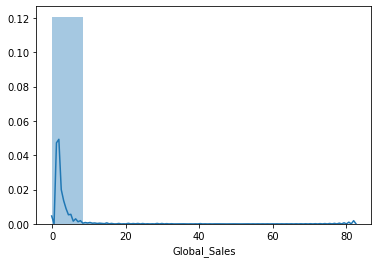

In [40]:
# Distribution of global sales
sns.distplot(df['Global_Sales'], bins=10)

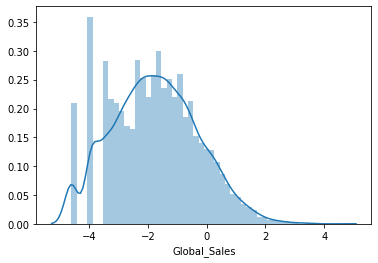

In [41]:
# Get the natural logarithmic value of the column 
sns.distplot(np.log(df['Global_Sales']))

In [42]:
df['Global_Sales'] = np.log(df['Global_Sales'])

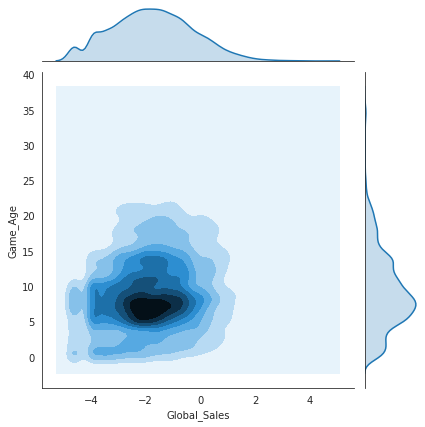

In [43]:
with sns.axes_style('white'):
    sns.jointplot("Global_Sales","Game_Age", df, kind='kde') #hex

In [44]:
modellog=OLS(y,add_constant(X))
resultslog=modellog.fit()

In [45]:
resultslog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     93.69
Date:                Fri, 07 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:43:53   Log-Likelihood:                -28784.
No. Observations:               16415   AIC:                         5.766e+04
Df Residuals:                   16371   BIC:                         5.800e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                2.356e-06   2.38e-06      0.991      0.322   -2.31e-06    7.02e-06
identifier                             -0.0001   2.53e-06    -54.645      0.000      -0.000      -0.000
Year_of_Release                        -0.0052      0.002     -2.133      0.033      -0.010      -0.000
Game_Age                                0.0100      0.003      2.985      0.003       0.003       0.017
Platform_Launch_Year                   -0.0015      0.001     -1.014      0.311      -0.004       0.001
Game_released_xYears_after_Platform    -0.0038      0.002     -1.572      0.116      -0.009       0.001
Platform_Death                          0.0076      0.003      2.356      0.018       0.001       0.014
Years_since_Platform_Discontinued      -0.0028      0.008     -0.372      0.710      -0.018       0.012
Platform_Lifespan                       0.0090      0.004      2.085      0.037       0.001       0.017
Action                                 -0.2311      0.054     -4.251      0.000      -0.338      -0.125
Adventure                              -0.0835      0.064     -1.315      0.189      -0.208       0.041
Fighting                               -0.2509      0.069     -3.649      0.000      -0.386      -0.116
Misc                                   -0.2223      0.059     -3.743      0.000      -0.339      -0.106
Puzzle                                 -0.1877      0.077     -2.449      0.014      -0.338      -0.037
Racing                                 -0.1586      0.063     -2.526      0.012      -0.282      -0.036
Role-Playing                           -0.1565      0.061     -2.577      0.010      -0.275      -0.037
Shooter                                -0.0463      0.063     -0.740      0.460      -0.169       0.076
Simulation                             -0.2614      0.069     -3.800      0.000      -0.396      -0.127
Sports                                 -0.2627      0.056     -4.659      0.000      -0.373      -0.152
Strategy                               -0.2700      0.074     -3.659      0.000      -0.415      -0.125
Platform_2600                          -0.6551      0.231     -2.841      0.005      -1.107      -0.203
Platform_3DO                            0.2731      0.759      0.360      0.719      -1.214       1.760
Platform_3DS                            0.1261      0.069      1.815      0.069      -0.010       0.262
Platform_DC                            -0.1852      0.238     -0.777      0.437      -0.652       0.282
Platform_DS                            -0.0104      0.039     -0.265      0.791      -0.087       0.066
Platform_GB                             1.2095      0.164      7.374      0.000       0.888       1.531
Platform_GBA                           -0.2138      0.066     -3.24

In [46]:
rsqlog = resultslog.rsquared
rsqlog

0.19748034837537543

In [47]:
data = {"OLS with all features:":rsq1,"OLS dropping platform dummies:":rsq2,
        "OLS dropping genre dummies:":rsq3,"OLS dropping release information:":rsq4,
        "OLS after log:":rsqlog}

pd.DataFrame.from_dict(data, orient='index',columns=['R-squared'])

,R-squared
OLS with all features:,0.197480
OLS dropping platform dummies:,0.186379
OLS dropping genre dummies:,0.194838
OLS dropping release information:,0.196769
OLS after log:,0.197480


In [28]:
import Assumptions as ass

In [29]:
tester=ass.Assumption_Tester_OLS(X,y)

Fitting linear regression

R^2: 0.19748034837537554 

Coefficients
-------------------------------------
Intercept: 10.946589555229274
identifier: -0.0
Year_of_Release: -0.01
Game_Age: 0.01
Platform_Launch_Year: -0.0
Game_released_xYears_after_Platform: -0.0
Platform_Death: 0.01
Years_since_Platform_Discontinued: -0.01
Platform_Lifespan: 0.01
Action: -0.23
Adventure: -0.08
Fighting: -0.25
Misc: -0.22
Puzzle: -0.19
Racing: -0.16
Role-Playing: -0.16
Shooter: -0.05
Simulation: -0.26
Sports: -0.26
Strategy: -0.27
Platform_2600: -0.66
Platform_3DO: 0.27
Platform_3DS: 0.13
Platform_DC: -0.19
Platform_DS: -0.01
Platform_GB: 1.21
Platform_GBA: -0.21
Platform_GC: -0.18
Platform_GEN: 0.18
Platform_GG: -0.1
Platform_N64: -0.16
Platform_NES: 0.87
Platform_NG: -0.11
Platform_PC: -0.1
Platform_PCFX: 0.27
Platform_PS: -0.16
Platform_PS2: -0.21
Platform_PS3: -0.06
Platform_PS4: 0.29
Platform_PSP: -0.06
Platform_PSV: 0.13
Platform_SAT: -0.3
Platform_SCD: -0.06
Platform_SNES: -0.18
Platform_TG16: -0.06


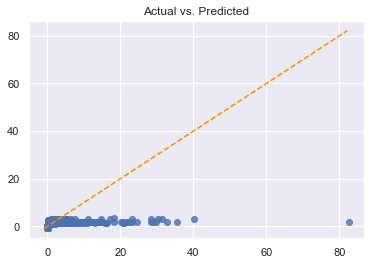

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with Global_Sales


Year_of_Release                       -0.076417
Game_Age                               0.076417
Platform_Launch_Year                  -0.004193
Game_released_xYears_after_Platform   -0.059095
Platform_Death                        -0.036714
Years_since_Platform_Discontinued      0.036714
Platform_Lifespan                     -0.022068
Name: Global_Sales, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with Global_Sales


identifier   -0.426949
Name: Global_Sales, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


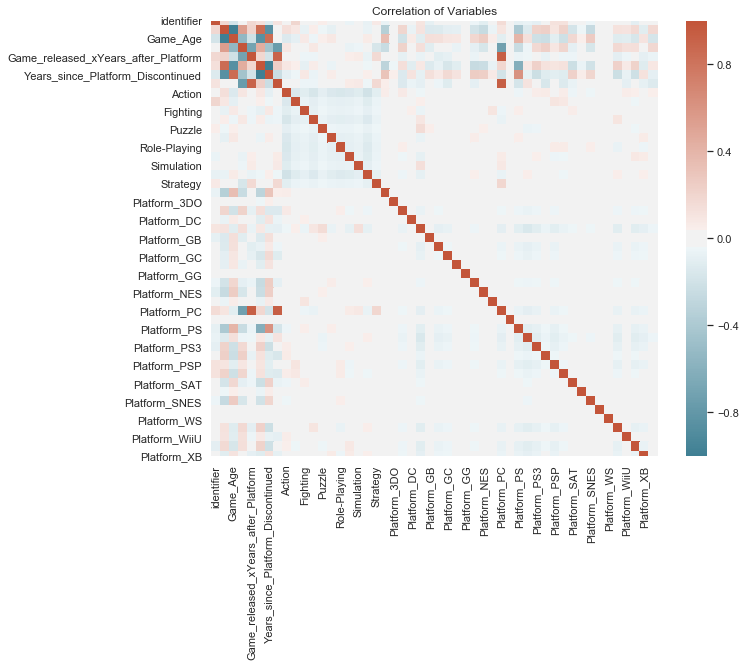

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------


/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Year_of_Release: inf
Game_Age: inf
Platform_Launch_Year: inf
Game_released_xYears_after_Platform: inf
Platform_Death: inf
Years_since_Platform_Discontinued: inf
Platform_Lifespan: inf
Platform_2600: inf
Platform_3DO: inf
Platform_3DS: inf
Platform_DC: inf
Platform_DS: inf
Platform_GB: inf
Platform_GBA: inf
Platform_GC: inf
Platform_GEN: inf
Platform_GG: inf
Platform_N64: inf
Platform_NES: inf
Platform_NG: inf
Platform_PC: inf
Platform_PCFX: inf
Platform_PS: inf
Platform_PS2: inf
Platform_PS3: inf
Platform_PS4: inf
Platform_PSP: inf
Platform_PSV: inf
Platform_SAT: inf
Platform_SCD: inf
Platform_SNES: inf
Platform_TG16: inf
Platform_WS: inf
Platform_Wii: inf
Platform_WiiU: inf
Platform_X360: inf
Platform_XB: inf
Platform_XOne: inf
Action: 3.9858938609406356
Sports: 3.2182409815968835
Misc: 2.7395401823142715
Role-Playing: 2.539959937219571
Adventure: 2.451032096903071
Shooter: 2.384706143711185
Racing: 2.2803953454659065
Simulation: 1.9587638748255298
Fighting: 1.9172825563227216
Strateg

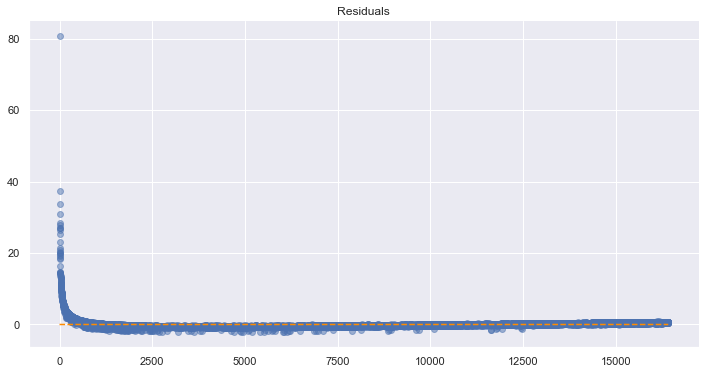

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 110.90490436080019,
 'pvalue for LM': 1.0703574964441162e-06,
 'F stats': 2.5897676692826885,
 'pvalue for Fstats': 6.118476619778823e-08}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_adnorm.py:67: RuntimeWarning: divide by zero encountered in log
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


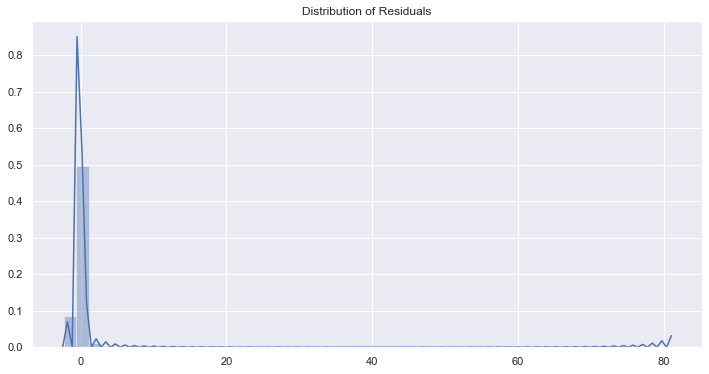


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


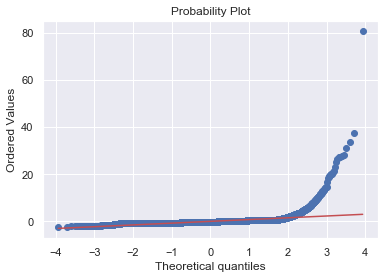


In your dataset you quite fat tails. You have 0.006 potential outliers (98 rows)


{'Satisfied': [],
 'Potentially': ['Linearity', 'Autocorrelation', 'Sub-Normality'],
 'Violated': ['Multicollinearity', 'Autocorrelation', 'Normality']}

In [30]:
tester.run_all()

In [31]:
X=X.drop(['Year_of_Release','Platform_Launch_Year','Game_released_xYears_after_Platform',
          'Platform_Death','Years_since_Platform_Discontinued','Platform_Lifespan',
          'Action','Adventure', 'Fighting', 'Misc', 'Puzzle', 
          'Racing', 'Role-Playing','Shooter', 'Simulation', 'Sports', 'Strategy'], axis=1)

In [32]:
tester2=ass.Assumption_Tester_OLS(X,y)

Fitting linear regression

R^2: 0.1948382099060174 

Coefficients
-------------------------------------
Intercept: 1.4877137706152992
identifier: -0.0
Game_Age: 0.02
Platform_2600: -0.78
Platform_3DO: 0.11
Platform_3DS: 0.2
Platform_DC: -0.29
Platform_DS: 0.06
Platform_GB: 1.22
Platform_GBA: -0.15
Platform_GC: -0.19
Platform_GEN: 0.09
Platform_GG: -0.05
Platform_N64: -0.24
Platform_NES: 0.79
Platform_NG: -0.32
Platform_PC: 0.21
Platform_PCFX: 0.15
Platform_PS: -0.27
Platform_PS2: -0.1
Platform_PS3: 0.06
Platform_PS4: 0.36
Platform_PSP: 0.04
Platform_PSV: 0.22
Platform_SAT: -0.4
Platform_SCD: -0.21
Platform_SNES: -0.2
Platform_TG16: -0.11
Platform_WS: -0.48
Platform_Wii: 0.13
Platform_WiiU: 0.1
Platform_X360: 0.08
Platform_XB: -0.21
Platform_XOne: 0.19

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


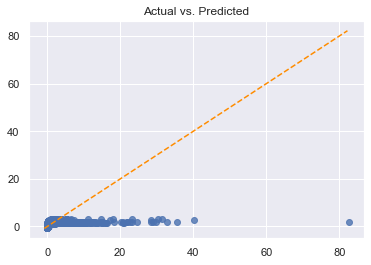

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with Global_Sales


Game_Age    0.076417
Name: Global_Sales, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with Global_Sales


identifier   -0.426949
Name: Global_Sales, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


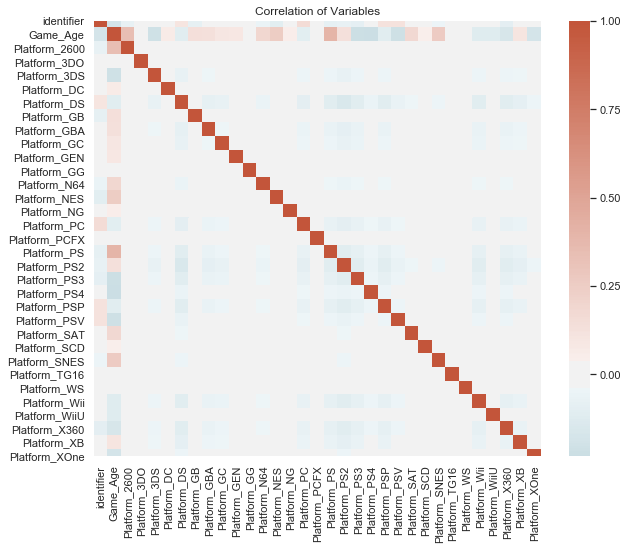

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Game_Age: 7.054235698816388
Platform_PS: 6.234543815430966
Platform_PS2: 5.1349816558480805
Platform_DS: 3.494801166863057
Platform_GBA: 2.947446771357034
Platform_XB: 2.869253354215639
Platform_2600: 2.6920818347569853
Platform_SNES: 2.5485905934059874
Platform_PSP: 2.339761508834036
Platform_N64: 2.3045178886005724
Platform_GC: 2.297716633678826
Platform_Wii: 2.1552532356270153
Platform_PC: 2.1158069403920634
Platform_NES: 2.0253979129552957
Platform_SAT: 1.9616646304307799
Platform_X360: 1.8300882167192738
Platform_PS3: 1.701130933535082
Platform_GB: 1.4989359593882274
Platform_PSV: 1.2218065565567024
Platform_3DS: 1.2069424992674687
Platform_DC: 1.1920150780548058
Platform_GEN: 1.18897789448616
identifier: 1.1613682431472339
Platform_PS4: 1.0818240927599605
Platform_NG: 1.0780732981343966
Platform_XOne:

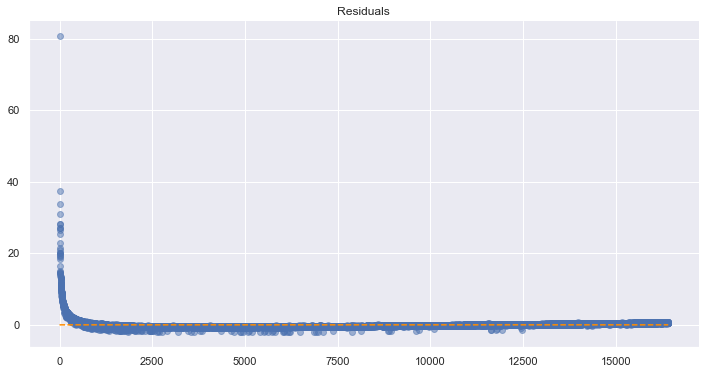

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 106.27038631675724,
 'pvalue for LM': 6.726687797664072e-10,
 'F stats': 3.3358696344680068,
 'pvalue for Fstats': 6.192006097381906e-10}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/stats/_adnorm.py:67: RuntimeWarning: divide by zero encountered in log
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


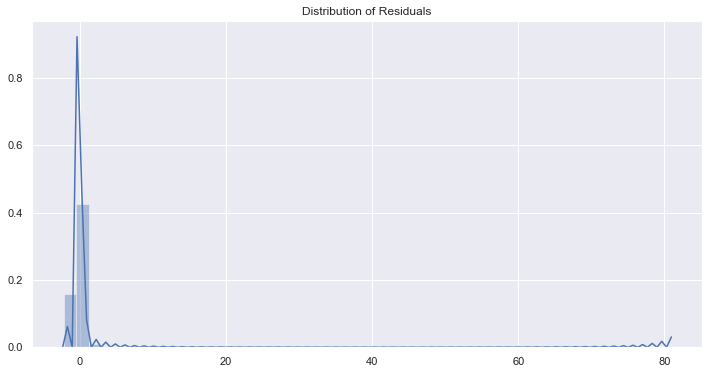


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


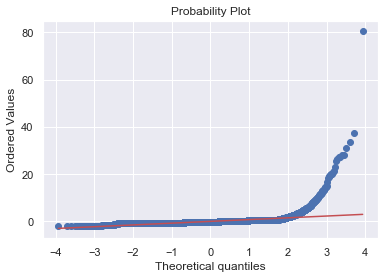


In your dataset you quite fat tails. You have 0.006 potential outliers (99 rows)


{'Satisfied': ['Multicollinearity'],
 'Potentially': ['Linearity', 'Autocorrelation', 'Sub-Normality'],
 'Violated': ['Autocorrelation', 'Normality']}

In [33]:
tester2.run_all()

In [83]:
model5=OLS(y,add_constant(X))
results5=model5.fit()

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [84]:
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     123.9
Date:                Fri, 07 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:33:23   Log-Likelihood:                -28811.
No. Observations:               16415   AIC:                         5.769e+04
Df Residuals:                   16382   BIC:                         5.794e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4412      0.110     13.153      0.000       1.226       1.656
identifier       -0.0001   2.49e-06    -55.536      0.000      -0.000      -0.000
Game_Age          0.0187      0.005      3.783      0.000       0.009       0.028
Platform_2600    -0.7368      0.179     -4.124      0.000      -1.087      -0.387
Platform_3DO      0.1517      0.788      0.192      0.847      -1.394       1.697
Platform_3DS      0.2510      0.114      2.202      0.028       0.028       0.475
Platform_DC      -0.2431      0.205     -1.186      0.236      -0.645       0.159
Platform_DS       0.1048      0.091      1.156      0.248      -0.073       0.283
Platform_GB       1.2697      0.163      7.812      0.000       0.951       1.588
Platform_GBA     -0.1049      0.094     -1.115      0.265      -0.289       0.079
Platform_GC      -0.1424      0.100     -1.430      0.153      -0.337       0.053
Platform_GEN      0.1364      0.277      0.493      0.622      -0.406       0.679
Platform_GG      -0.0081      1.360     -0.006      0.995      -2.674       2.658
Platform_N64     -0.1922      0.112     -1.711      0.087      -0.412       0.028
Platform_NES      0.8406      0.175      4.802      0.000       0.498       1.184
Platform_NG      -0.2732      0.402     -0.680      0.496      -1.061       0.514
Platform_PC       0.2541      0.098      2.606      0.009       0.063       0.445
Platform_PCFX     0.2009      1.359      0.148      0.883      -2.464       2.866
Platform_PS      -0.2208      0.092     -2.405      0.016      -0.401      -0.041
Platform_PS2     -0.0579      0.087     -0.668      0.504      -0.228       0.112
Platform_PS3      0.1057      0.099      1.067      0.286      -0.088       0.300
Platform_PS4      0.4073      0.124      3.290      0.001       0.165       0.650
Platform_PSP      0.0820      0.095      0.862      0.389      -0.105       0.269
Platform_PSV      0.2696      0.119      2.262      0.024       0.036       0.503
Platform_SAT     -0.3529      0.134     -2.627      0.009      -0.616      -0.090
Platform_SCD     -0.1606      0.561     -0.286      0.775      -1.261       0.939
Platform_SNES    -0.1567      0.126     -1.246      0.213      -0.403       0.090
Platform_TG16    -0.0677      0.963     -0.070      0.944      -1.956       1.821
Platform_WS      -0.4346      0.560     -0.777      0.437      -1.532       0.663
Platform_Wii      0.1804      0.095      1.894      0.058      -0.006       0.367
Platform_WiiU     0.1415      0.149      0.949      0.343      -0.151       0.434
Platform_X360     0.1304      0.097      1.337      0.181      -0.061       0.321
Platform_XB      -0.1681      0.094     -1.790      0.074      -0.352       0.016
Platform_XOne     0.2348      0.134      1.751      0.080      -0.028       0.498
=================================================

In [86]:
X=X.drop(['identifier', 'Game_Age', 'Platform_3DO',
       'Platform_3DS', 'Platform_DS', 'Platform_GB','Platform_GEN', 'Platform_NES', 'Platform_PC',
       'Platform_PCFX', 'Platform_PS3',
       'Platform_PS4', 'Platform_PSP', 'Platform_PSV',
       'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne'], axis=1)

In [90]:
X.columns

Index(['Platform_2600', 'Platform_DC', 'Platform_GBA', 'Platform_GC',
       'Platform_GG', 'Platform_N64', 'Platform_NG', 'Platform_PS',
       'Platform_PS2', 'Platform_SAT', 'Platform_SCD', 'Platform_SNES',
       'Platform_TG16', 'Platform_WS', 'Platform_XB'],
      dtype='object')

In [91]:
model6=OLS(y,add_constant(X))
results6=model6.fit()

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumer

In [92]:
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.030
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           2.18e-07
Time:                        13:36:16   Log-Likelihood:                -30560.
No. Observations:               16415   AIC:                         6.115e+04
Df Residuals:                   16399   BIC:                         6.128e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5511      0.016     35.457      0.000       0.521       0.582
Platform_2600     0.1952      0.145      1.342      0.180      -0.090       0.480
Platform_DC      -0.2440      0.217     -1.127      0.260      -0.669       0.181
Platform_GBA     -0.1623      0.058     -2.813      0.005      -0.275      -0.049
Platform_GC      -0.1874      0.069     -2.728      0.006      -0.322      -0.053
Platform_GG      -0.5111      1.558     -0.328      0.743      -3.565       2.542
Platform_N64      0.1394      0.089      1.566      0.117      -0.035       0.314
Platform_NG      -0.4311      0.450     -0.958      0.338      -1.313       0.451
Platform_PS       0.0601      0.048      1.259      0.208      -0.033       0.154
Platform_PS2      0.0288      0.037      0.774      0.439      -0.044       0.102
Platform_SAT     -0.3570      0.119     -2.988      0.003      -0.591      -0.123
Platform_SCD     -0.2395      0.636     -0.376      0.707      -1.486       1.007
Platform_SNES     0.2859      0.102      2.804      0.005       0.086       0.486
Platform_TG16    -0.4711      1.102     -0.428      0.669      -2.630       1.688
Platform_WS      -0.3145      0.636     -0.494      0.621      -1.561       0.932
Platform_XB      -0.2372      0.057     -4.152      0.000      -0.349      -0.125
==============================================================================
Omnibus:                    34004.075   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246934714.436
Skew:                          17.339   Prob(JB):                         0.00
Kurtosis:                     602.863   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df.columns

#### Assumptions

In [76]:
y=df1.Global_Sales
X=df1.drop('Global_Sales',axis=1)

In [ ]:
tester=ass.Assumption_Tester_OLS(X,y)

In [ ]:
tester.run_all()

### 3. Second set of models

In [34]:
X_train, X_test,y_train,y_test = train_test_split(df1.drop('Global_Sales',axis=1), \
                                                  df1.Global_Sales, \
                                                  test_size=1/3, \
                                                  random_state=42)

#### Logistic Regression

In [95]:
model3=LogisticRegression(max_iter=1e8, multi_class='multinomial')
model3.fit(X_train,y_train)

y_pred3=model3.predict(X_test)
conf3=confusion_matrix(y_test,y_pred3)
display(conf3)

acc3=accuracy_score(y_test,y_pred3)
rec3=recall_score(y_test,y_pred3)
pr3=precision_score(y_test,y_pred3)
f13=f1_score(y_test,y_pred3)

print(acc2,pr2,rec2,f12)

ValueError: Unknown label type: 'continuous'

#### ROC Curve

In [ ]:
model_roc1=roc_auc_score(y_test, y_pred7)
fpr1,tpr1,thresholds1=roc_curve(y_test, model7.predict_proba(X_test)[:,1])



In [ ]:
#Possibilities:
#age squared
